In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

In [4]:
from torchvision import datasets, transforms
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), ])
print(transform)

Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)


In [5]:
trainset = datasets.CIFAR10('CIFAR10_data/', download = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

Files already downloaded and verified


In [6]:
#a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images 
#containing one of 10 object classes, with 6000 images per class.

print(len(trainset))
indexs = list(range(len(trainset)))
#print(len(indexs))
print(indexs[0:2])

50000
[0, 1]


In [7]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 3, 32, 32])
torch.Size([64])


In [8]:
print(images[0].shape)

torch.Size([3, 32, 32])


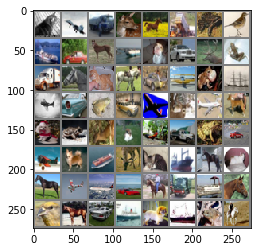

  cat plane truck  deer


In [10]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels



classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [11]:
import torch.nn as nn
import torch.nn.functional as F

#having 10 classes
#32x32 pixels
#

In [24]:
#Build a fed-forward method
model = nn.Sequential(nn.Linear(3072, 100), #input,hidden
                      nn.ReLU(),
                      nn.Linear(100, 64), 
                      nn.ReLU(),
                      nn.Linear(64, 10), #hidden, output
                      nn.LogSoftmax(dim = 1)) 

#criterion =  nn.CrossEntropyLoss(); orrrrr
criterion = nn.NLLLoss()

images, labels = next(iter(trainloader))

images = images.view(images.shape[0], -1)

logits = model(images)

loss = criterion(logits, labels)

#print(loss)

In [25]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 5.7426e-05,  8.8017e-05,  4.3077e-05,  ...,  2.3493e-04,
          2.2847e-04, -1.4141e-04],
        [-1.7758e-03, -1.7954e-03, -1.7585e-03,  ..., -2.1229e-03,
         -1.9581e-03, -1.7971e-03],
        [ 2.4969e-03,  1.9271e-03,  1.5671e-03,  ...,  1.0352e-03,
          8.2861e-04,  5.6658e-04],
        ...,
        [-1.1201e-03, -1.0362e-03, -1.3285e-03,  ..., -1.9721e-04,
          2.4889e-05,  5.9923e-04],
        [ 9.3761e-04,  5.2238e-04,  5.4206e-04,  ...,  1.3731e-03,
          1.3616e-03,  1.4495e-03],
        [-7.6112e-04, -1.0041e-03, -1.0938e-03,  ..., -1.5942e-03,
         -1.7289e-03, -1.6869e-03]])


In [27]:
#using the above gradients need to intialize the weights / update
from torch import optim

optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [30]:
print('Initialize weights : ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 3072)
optimizer.zero_grad()
output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print('gradeint : - ', model[0].weight.grad)

Initialize weights :  Parameter containing:
tensor([[-0.0101,  0.0041, -0.0153,  ..., -0.0082,  0.0014,  0.0098],
        [-0.0141,  0.0159, -0.0110,  ..., -0.0078,  0.0156, -0.0036],
        [ 0.0119, -0.0159,  0.0147,  ...,  0.0009,  0.0160,  0.0047],
        ...,
        [ 0.0108, -0.0077,  0.0061,  ..., -0.0095,  0.0043,  0.0132],
        [-0.0114, -0.0003, -0.0018,  ...,  0.0178,  0.0123, -0.0144],
        [-0.0048, -0.0096, -0.0174,  ...,  0.0054,  0.0018,  0.0064]],
       requires_grad=True)
gradeint : -  tensor([[-4.5427e-04, -2.8055e-04, -3.8326e-04,  ..., -9.2085e-04,
         -9.3213e-04, -9.6188e-04],
        [-1.6879e-03, -1.7881e-03, -1.2133e-03,  ..., -6.9839e-04,
         -6.5877e-04, -8.7433e-04],
        [ 1.1909e-03,  1.4224e-03,  1.5852e-03,  ..., -1.4565e-04,
         -2.9510e-04, -2.1486e-04],
        ...,
        [-8.0935e-04, -7.0174e-04, -3.3505e-04,  ..., -2.1005e-03,
         -1.8941e-03, -1.6618e-03],
        [-7.0203e-04, -5.9625e-04, -5.2221e-04,  ...,  1

In [32]:
optimizer.step()
print('Update weights : -', model[0].weight)

Update weights : - Parameter containing:
tensor([[-0.0101,  0.0041, -0.0153,  ..., -0.0082,  0.0014,  0.0098],
        [-0.0141,  0.0159, -0.0110,  ..., -0.0078,  0.0156, -0.0036],
        [ 0.0118, -0.0160,  0.0147,  ...,  0.0009,  0.0160,  0.0047],
        ...,
        [ 0.0108, -0.0077,  0.0061,  ..., -0.0095,  0.0044,  0.0133],
        [-0.0114, -0.0002, -0.0018,  ...,  0.0178,  0.0123, -0.0144],
        [-0.0048, -0.0096, -0.0174,  ...,  0.0053,  0.0018,  0.0064]],
       requires_grad=True)
